# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [21]:
# Resolver acá


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [ ]:
# Resolver acá


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

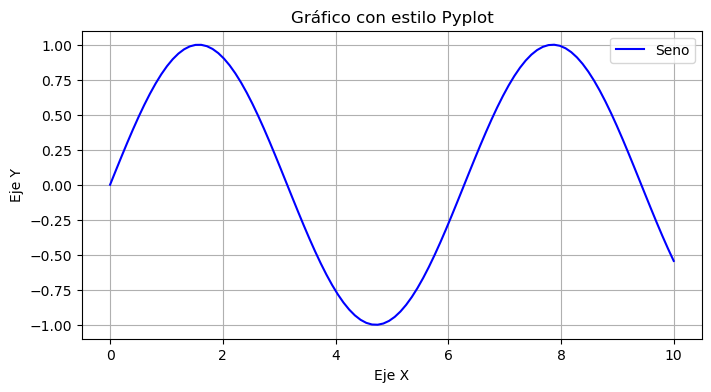

In [6]:
# Resolver acá estilo pyplot
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 1️⃣ Gráfico con estilo Pyplot
plt.figure(figsize=(8, 4))
plt.plot(x, y1, label='Seno', color='b')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico con estilo Pyplot')
plt.legend()
plt.grid()
plt.show()



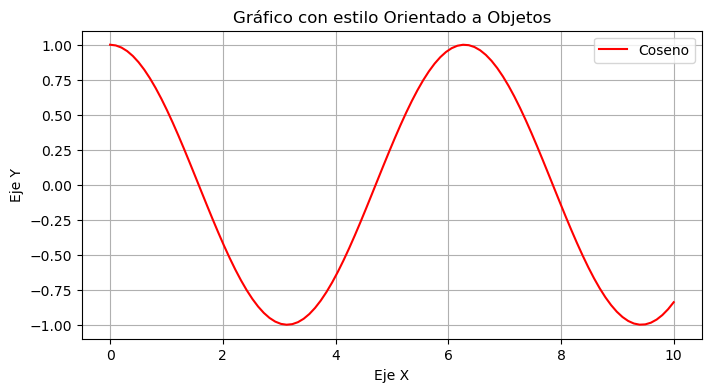

In [8]:
# 2️ Gráfico con estilo orientado a objetos
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y2, label='Coseno', color='r')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfico con estilo Orientado a Objetos')
ax.legend()
ax.grid()
plt.show()


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [2]:
pip install requests beautifulsoup4 pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la portada de La Nación
URL = "https://www.lanacion.com.ar/"

# Realizar la solicitud HTTP
response = requests.get(URL)
if response.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontrar todos los enlaces de noticias
    links = []
    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        if '/nota/' in href or '/politica/' in href or '/economia/' in href:  
            if not href.startswith("http"):
                href = "https://www.lanacion.com.ar" + href  
            links.append(href)
    
    # Guardar en un DataFrame y exportar a Excel
    df = pd.DataFrame(links, columns=["Links"])
    df.to_excel("links_noticias_lanacion.xlsx", index=False)
    print("✅ Los links de noticias se han guardado en 'links_noticias_lanacion.xlsx'.")
else:
    print("❌ No se pudo obtener la página. Verifica la URL o tu conexión a internet.")


✅ Los links de noticias se han guardado en 'links_noticias_lanacion.xlsx'.
